In [2]:

# basic imports
from __future__ import print_function
import numpy as np
from numpy.linalg import eig, inv
import time

# plotting elements
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
cmap = cm.RdBu_r



# exptool imports
from exptool.io import psp_io
from exptool.utils import kde_3d
from exptool.observables import transform
from exptool.analysis import pattern
from exptool.analysis import trapping
from exptool.utils import *
from exptool.observables import visualize
from exptool.basis import spheresl
from exptool.basis import eof

# astropy imports
import astropy.coordinates as coord
import astropy.units as u

import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline
import scipy

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2



mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

from exptool.utils import *


stylepar='medium'

if stylepar == 'medium':
    mpl.rcParams['font.weight'] = 'medium'
    mpl.rcParams['axes.linewidth'] = 1.5
    mpl.rcParams['xtick.major.width'] = 1.5
    mpl.rcParams['xtick.minor.width'] = 0.75
    mpl.rcParams['xtick.minor.visible'] = True
    mpl.rcParams['ytick.major.width'] = 1.5
    mpl.rcParams['ytick.minor.width'] = 0.75
    mpl.rcParams['ytick.minor.visible'] = True




# follow along here

# http://docs.astropy.org/en/stable/generated/examples/coordinates/plot_galactocentric-frame.html#sphx-glr-generated-examples-coordinates-plot-galactocentric-frame-py

import astropy.coordinates as coord
import astropy.units as u



In [3]:

def norm_histogram(arr,bins=-1):
    
    if bins == -1:
        bins = int(len(arr)/100.)
        
    a = np.percentile(arr,0.0)
    A = np.percentile(arr,99.9)
    binvals = np.linspace(a,A,bins)
    outvals = np.zeros(binvals.size)
    #print(a,A,bins)
    da = (A-a)/(bins)
    
    for val in arr:
        #print(val-a,(val-a)/(da))
        indx = (val-a)/da
        if indx>bins-1: indx=bins-1
        #print(indx)
        outvals[int(indx)] += 1
        
    return binvals,outvals/(len(arr)*(A-a)/(bins-1))




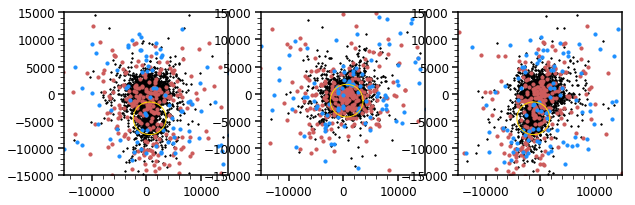

In [5]:
# look for substructure in BHBs

mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top']   = True

def return_angular_momentum(In):
    
    x    = In[:,0]
    y    = In[:,1]
    z    = In[:,2]
    vx   = In[:,3]
    vy   = In[:,4]
    vz   = In[:,5]
    
    Lx = (y*vz - z*vy)
    Ly = (z*vx - x*vz)
    Lz = (x*vy - y*vx)

    return Lx,Ly,Lz



def clean_sgr(Lx,Ly,Lz,sgrcen):
    lxdiff = Lx - sgrcen[0]
    lydiff = Ly - sgrcen[1]
    lzdiff = Lz - sgrcen[2]
    ldiff = np.sqrt(lxdiff*lxdiff + lydiff*lydiff + lzdiff*lzdiff)
    return ldiff

sgrvals = [605, -4515, -1267]
#ldiff = clean_sgr(Lx,Ly,Lz,sgrvals)





fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

In = np.genfromtxt('/Users/mpetersen/Dropbox/mike/data/KGiants_cartesian_heliocentric_sgr.txt',skip_header=1)
Lx,Ly,Lz = return_angular_momentum(In)
d = In[:,8]

ax1.scatter(Lx,Ly,color='black',s=1.)
ax2.scatter(Lx,Lz,color='black',s=1.)
ax3.scatter(Lz,Ly,color='black',s=1.)

In = np.genfromtxt('/Users/mpetersen/Dropbox/mike/data/BHBs_cartesian_heliocentric_sgr.txt',skip_header=1)
ax1.scatter(Lx,Ly,color='black',s=1.)
ax2.scatter(Lx,Lz,color='black',s=1.)
ax3.scatter(Lz,Ly,color='black',s=1.)


In = np.genfromtxt('/Users/mpetersen/Dropbox/mike/data/KGiants_cartesian_heliocentric_sgr.txt',skip_header=1)
Lx,Ly,Lz = return_angular_momentum(In)
d = In[:,8]
d = np.sqrt(In[:,0]*In[:,0] + In[:,1]*In[:,1] + In[:,2]*In[:,2])


dlim = 50
ax1.scatter(Lx[d>dlim],Ly[d>dlim],color='indianred',s=10.)
ax2.scatter(Lx[d>dlim],Lz[d>dlim],color='indianred',s=10.)
ax3.scatter(Lz[d>dlim],Ly[d>dlim],color='indianred',s=10.)



In = np.genfromtxt('/Users/mpetersen/Dropbox/mike/data/BHBs_cartesian_heliocentric_sgr.txt',skip_header=1)

Lx,Ly,Lz = return_angular_momentum(In)
d = In[:,8]
d = np.sqrt(In[:,0]*In[:,0] + In[:,1]*In[:,1] + In[:,2]*In[:,2])



dlim = 50
ax1.scatter(Lx[d>dlim],Ly[d>dlim],color='dodgerblue',s=10.)
ax2.scatter(Lx[d>dlim],Lz[d>dlim],color='dodgerblue',s=10.)
ax3.scatter(Lz[d>dlim],Ly[d>dlim],color='dodgerblue',s=10.)


circlerad = 3000
circlevals = np.linspace(0.,2*np.pi,100)
sgrvals = [605, -4515, -1267]
ax1.plot(circlerad*np.cos(circlevals)+sgrvals[0],circlerad*np.sin(circlevals)+sgrvals[1],color='gold',lw=1.)
ax2.plot(circlerad*np.cos(circlevals)+sgrvals[0],circlerad*np.sin(circlevals)+sgrvals[2],color='gold',lw=1.)
ax3.plot(circlerad*np.cos(circlevals)+sgrvals[2],circlerad*np.sin(circlevals)+sgrvals[1],color='gold',lw=1.)

#circlerad = 5000
#circlevals = np.linspace(0.,2*np.pi,100)
#sgrvals = [-605, 4515, -1267]
#ax1.plot(circlerad*np.cos(circlevals)+sgrvals[0],circlerad*np.sin(circlevals)+sgrvals[1],color='gold',lw=1.)
#ax2.plot(circlerad*np.cos(circlevals)+sgrvals[0],circlerad*np.sin(circlevals)+sgrvals[2],color='gold',lw=1.)
#ax3.plot(circlerad*np.cos(circlevals)+sgrvals[2],circlerad*np.sin(circlevals)+sgrvals[1],color='gold',lw=1.)





for iax,ax in enumerate([ax1,ax2,ax3]):
    maxval = 15000
    ax.axis([-maxval,maxval,-maxval,maxval])

    
plt.savefig('figures/sgr_test_50_kpc.png')



# 605, -4515, 1267

In [46]:

In = np.genfromtxt('/Users/mpetersen/Dropbox/mike/data/KGiants_cartesian_heliocentric_sgr_corr.txt',skip_header=1)
#In = np.genfromtxt('/Users/mpetersen/Dropbox/mike/data/BHBs_cartesian_heliocentric_sgr_lancasterremoved.txt',skip_header=1)

Lx,Ly,Lz = return_angular_momentum(In)
d = In[:,8]


d = np.sqrt(In[:,0]*In[:,0] + In[:,1]*In[:,1] + In[:,2]*In[:,2])

dlim = 40.
lzlim = 3000.
sgrvals = [605., -4515., -1267.]

ldiff = clean_sgr(Lx,Ly,Lz,sgrvals)

larger_than_40 = np.where(d>dlim)[0]

print(larger_than_40.size)

sgr_larger_than_40 = np.where((d>dlim) & (ldiff<lzlim))[0]
nonsgr_larger_than_40 = np.where((d>dlim) & (ldiff>lzlim))[0]


print(nonsgr_larger_than_40.size)





677
558


In [41]:
import reflexmotion.reflex as rm

In [47]:
r,theta,phi,vr,vtheta,vphi = rm.compute_spherical(In[:,0],In[:,1],In[:,2],In[:,3],In[:,4],In[:,5],twopi=True)

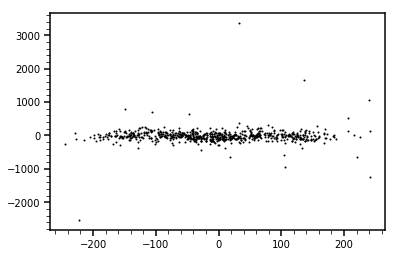

In [55]:
dlim = 40.

plt.scatter(vr[r>dlim],vphi[r>dlim],color='black',s=1.)



In [37]:
f = open('/Users/mpetersen/Dropbox/mike/data/BHBs_cartesian_heliocentric_sgr_lancasterremoved.txt')
line = f.readline()

for indx,val in enumerate(line.split(';')):
    print(indx,val)
    
f.close()

0 x [kpc]
1  y [kpc]
2  z [kpc]
3  vx [km/s]
4  vy [km/s]
5  vz [km/s]
6       l [deg]
7  b [deg]
8  dist [kpc]
9  vlos [km/s]
10  dmu_l [marcsec/yr]
11  dmu_b [marcsec/yr]
12        edist[kpc]
13  evlost [km/s]
14  edmu_l [marcsec/yr]
15  edmu_b [marcsec/yr]
16       sgrweak [bool]
17  sgrstrong [bool]
18  FeH [dex]
19  Sgr Lambda [deg]
20  Sgr Beta [deg]
21  Belokurov Flag [bool]
22  corrcoef [-1:1]



In [39]:
dmul = In[:,10]
rad = In[:,8]
dk  =4.74057           #conversion from km/s
par =1./rad             #arc sec --> rad in [kpc]
vl = dmul*dk/par


## Load up RR Lyrae data

In [5]:
'''
# get the rr lyrae FROM gaia
# how many is this returning?

SELECT gaia.source_id,gaia.ra,gaia.ra_error,gaia.dec,gaia.dec_error,
gaia.parallax,gaia.parallax_error,gaia.pmra,gaia.pmra_error,
gaia.pmdec,gaia.pmdec_error,gaia.phot_g_mean_flux,gaia.phot_g_mean_flux_error,
gaia.phot_g_mean_mag,gaia.phot_bp_mean_flux,gaia.phot_bp_mean_flux_error,
gaia.bp_rp,gaia.radial_velocity,gaia.radial_velocity_error,
variables.best_class_name,variables.best_class_score,gaia.teff_val,gaia.a_g_val
FROM gaiadr2.gaia_source AS gaia
INNER JOIN gaiadr2.vari_classifier_result AS variables 
    ON variables.source_id = gaia.source_id


'''

# RR Lyrae from vari_classifier_result
GRRV = np.genfromtxt('../Shells/data/gaia_allvariable.csv',\
                        dtype={'names': ("gsource_id","ra","ra_error","dec","dec_error",\
                                        "parallax","parallax_error","pmra","pmra_error","pmdec",\
                                         "pmdec_error","phot_g_mean_flux","phot_g_mean_flux_error","phot_g_mean_mag",\
                                         "phot_bp_mean_flux","phot_bp_mean_flux_error","bp_rp","radial_velocity","radial_velocity_error",\
                                         "best_class_name","best_class_score","teff_val","a_g_val"),\
                             'formats': ('f16','f8','f8','f8','f8',\
                                         'f8','f8','f8','f8','f8',\
                                         'f8','f8','f8','f8',\
                                         'f8','f8','f8','f8','f8',\
                                        'S20','f8','f8','f8')},\
                 skip_header=1,delimiter=',')





In [6]:
'''

# just from rrlyrae table: specific object study

SELECT gaia.source_id,gaia.ra,gaia.ra_error,gaia.dec,gaia.dec_error,
gaia.parallax,gaia.parallax_error,gaia.pmra,gaia.pmra_error,
gaia.pmdec,gaia.pmdec_error,gaia.phot_g_mean_flux,gaia.phot_g_mean_flux_error,
gaia.phot_g_mean_mag,gaia.phot_bp_mean_flux,gaia.phot_bp_mean_flux_error,
gaia.bp_rp,gaia.radial_velocity,gaia.radial_velocity_error,
variables.metallicity,variables.best_classification,gaia.teff_val,gaia.a_g_val
FROM gaiadr2.gaia_source AS gaia
INNER JOIN gaiadr2.vari_rrlyrae AS variables 
    ON variables.source_id = gaia.source_id

'''

# RR Lyrae from specific object studies (SOS)
GRRL = np.genfromtxt('../Shells/data/varirrlyrae.csv',\
                        dtype={'names': ("gsource_id","ra","ra_error","dec","dec_error",\
                                        "parallax","parallax_error","pmra","pmra_error","pmdec",\
                                         "pmdec_error","phot_g_mean_flux","phot_g_mean_flux_error","phot_g_mean_mag",\
                                         "phot_bp_mean_flux","phot_bp_mean_flux_error","bp_rp","radial_velocity","radial_velocity_error",\
                                         "metallicity","best_class","teff_val","a_g_val","ebv"),\
                             'formats': ('f16','f8','f8','f8','f8',\
                                         'f8','f8','f8','f8','f8',\
                                         'f8','f8','f8','f8',\
                                         'f8','f8','f8','f8','f8',\
                                        'f8','S20','f8','f8','f8')},\
                 skip_header=1,delimiter=',')





In [24]:
#RAJ2000;DEJ2000;GLON;GLAT;gmag;u-g;D0.2;fm;cHg;bHg;d;r;x;y;z;HRV;e_HRV;Vgal;DR8;Sloan;SimbadName


#RAJ2000;DEJ2000;S3ab;S3c;DM;Per;phi0;gAmp;rAmp;iAmp;zAmp;gmag;rmag;imag;zmag;<gmag>;<rmag>;<imag>;
#<zmag>;E(B-V);S10;PS1;Sloan;SimbadName

S17 = np.genfromtxt('../Shells/data/Sesar17.txt',\
                        dtype={'names': ("ra","dec","S3ab","S3c",\
                                         "DM","Per","phi0","gAmp",\
                                         "rAmp","iAmp","zAmp","gmag",\
                                         "rmag","imag","zmag","gmaga",\
                                        "rmaga","imaga","zmaga","ebv",\
                                        "S10","PS1","SL","Simbad"),\
                             'formats': ('f8','f8','f8','f8',\
                                        'f8','f8','f8','f8',\
                                        'f8','f8','f8','f8',\
                                        'f8','f8','f8','f8',\
                                        'f8','f8','f8','f8',\
                                         'f8','S20','S20','S20')},\
                 skip_header=81,delimiter=';')



Gmatch = np.genfromtxt('../Shells/SesarGaiaComp.csv',\
                        dtype={'names': ("xsource_id","gsource_id","ra","ra_error","dec","dec_error",\
                                        "parallax","parallax_error","pmra","pmra_error","pmdec",\
                                         "pmdec_error","phot_g_mean_flux","phot_g_mean_flux_error","phot_g_mean_mag",\
                                         "phot_bp_mean_flux","phot_bp_mean_flux_error","bp_rp","radial_velocity","radial_velocity_error",\
                                         "phot_variable_flag","teff_val","a_g_val","dist"),\
                             'formats': ('i4','f8','f8','f8','f8','f8',\
                                         'f8','f8','f8','f8','f8',\
                                         'f8','f8','f8','f8','f8',\
                                         'f8','f8','f8','f8','f8',\
                                        'f8','f8','f8','f8')},\
                 skip_header=1,delimiter=',')






In [25]:
rrls1 = np.where(((GRRL['best_class']==b'RRab') | (GRRL['best_class']==b'RRc') |\
               (GRRL['best_class']==b'RRd'))\
                 & (np.isfinite(GRRL['pmra'])) & (np.isfinite(GRRL['pmdec'])))[0]



print(rrls1.size)


rrls2 = np.where((GRRV['best_class_name']==b'RRAB') | (GRRV['best_class_name']==b'RRC') |\
               (GRRV['best_class_name']==b'RRD') | (GRRV['best_class_name']==b'ARRD'))[0]

print(rrls2.size)

# do a source_id comp

uni_ids,uni_indx = np.unique(np.concatenate([GRRV['gsource_id'][rrls2],GRRL['gsource_id'][rrls1]]),return_index=True)
print(uni_ids)
print(uni_ids.size)
# this is not the number from Iorio: 228853. Why?
# need to pull out the mis-identified ones, probably...i.e. Cheng+ 2019


#print(uni_indx)

all_ra  = np.concatenate([GRRV['ra'][rrls2],GRRL['ra'][rrls1]])[uni_indx]
all_dec = np.concatenate([GRRV['dec'][rrls2],GRRL['dec'][rrls1]])[uni_indx]

print(all_ra.size)



# this number matches the Holl result.

135825
195780
[2.88243845e+14 5.00243431e+14 5.07222753e+14 ... 6.91716451e+18
 6.91723199e+18 6.91726408e+18]
225108
225108


In [26]:


# set the coordinates for transformation

# use the schonrich 2010 peculiar motions
usun = 11.1
vsun = 12.24
wsun = 7.25

# use the circular velocity from ...
vcirc = 235.

# the value of mcmillan 2017
vcirc = 232.

# use the gravity 2018 result for the galactic center distance
rsun = 8.3 # in kpc

# use the sun's height above the midplane from Bovy...
zsun = 30 # in pc

v_sun = coord.CartesianDifferential([usun, vsun+vcirc, wsun]*u.km/u.s)
gc_frame = coord.Galactocentric(galcen_distance=rsun*u.kpc,
                                galcen_v_sun=v_sun,
                                z_sun=zsun*u.pc)


class dataset(object):
    '''placeholder for all the quantities we want
    '''
    ra = None
    dec = None
    l = None
    b = None
    d = None
    x = None
    y = None
    z = None
    vx = None
    vy = None
    vz = None
    r = None
    th = None
    ph = None
    vr = None
    vth = None
    vph = None
    pmra = None
    pmdec = None
    epmra = None
    epmdec = None
    vrad = None
    evrad = None
    feh = None
    gflux = None

    
class newcoordinates():
    """take a system with
    
    ra,dec,ra_error,dec_error,pmra,pmdec,pmra_error,pmdec_error,dist,dist_error
    
    """
    
    def __init__(self,inputcatalog,errors=False):
        """take input catalog and make homogenous system
        
        how do we treat missing data in this framework?
        
        """
        
        self.ra       = inputcatalog['ra']
        self.dec      = inputcatalog['dec']
        self.d        = inputcatalog['d']
        self.pmra     = inputcatalog['pmra']
        self.pmdec    = inputcatalog['pmdec']
        self.vrad     = inputcatalog['vrad']

    
        if errors:
            self.raerr    = inputcatalog['raerr']
            self.decerr   = inputcatalog['decerr']
            self.derr     = inputcatalog['derr']        
            self.pmraerr  = inputcatalog['pmraerr']        
            self.pmdecerr = inputcatalog['pmdecerr']        
            self.vraderr  = inputcatalog['vraderr']
        
        
    def find_covariances(self):
        """look at the errors and find real estimates for errors based on the covariances
        
        -should we brute force the errors as a monte carlo?
        
        """
        
        cplus = coord.SkyCoord(ra  = self.ra    + self.raerr    * u.deg,\
                   dec             = self.dec   + self.decerr   * u.deg,\
                   distance        = self.d     + self.derr     * u.kpc,\
                   pm_ra_cosdec    = self.pmra  + self.pmraerr  * u.mas/u.yr,\
                   pm_dec          = self.pmdec + self.pmdecerr * u.mas/u.yr,\
                   radial_velocity = self.vrad  + self.vraderr  * u.km/u.s)
        


    def gc_transform(self):
        '''define a galactic transform
        
        '''
        
        c = coord.SkyCoord(ra      = self.ra    * u.deg,\
                   dec             = self.dec   * u.deg,\
                   distance        = self.d     * u.kpc,\
                   pm_ra_cosdec    = self.pmra  * u.mas/u.yr,\
                   pm_dec          = self.pmdec * u.mas/u.yr,\
                   radial_velocity = self.vrad  * u.km/u.s)
        

        gal_defined = c.transform_to(gc_frame)
        gal_latlon  = c.transform_to('galactic')
        
        self.x = gal_defined.x
        self.y = gal_defined.y
        self.z = gal_defined.z
        
        self.vx = gal_defined.v_x
        self.vy = gal_defined.v_y
        self.vz = gal_defined.v_z

        # do a transform of l to the correct orientation?
        tmpl = gal_latlon.l
        
        self.l = 360.-np.array(tmpl)

        self.l[self.l>180.] -= 360.
        self.l *= -1.
        
        
        
        self.b = gal_latlon.b
        
        # be careful about the cos(b) term included here...
        self.vl = gal_latlon.pm_l_cosb
        self.vb = gal_latlon.pm_b

    def sph_transform(self):
        """convert cartesian to spherical
        """
        self.rho = np.sqrt(self.x*self.x + self.y*self.y + self.z*self.z)
        self.r = np.sqrt(self.x*self.x + self.y*self.y)
        self.theta = np.arctan2(self.y,self.x)
        self.phi = np.arccos(self.z/self.r)

        self.vr = (self.x*self.vx + self.y*self.vy + self.z*self.vz)/self.rho
        self.vtheta = (self.vx*self.y - self.x*self.vy)/(self.r*self.r)
        self.vphi = ( self.z*(self.x*self.vx + self.y*self.vy) \
                     - self.r*self.r*self.vz )/(self.rho*self.rho*self.r)   
        
        
    

    

In [27]:

uni_ids,uni_indx = np.unique(np.concatenate([GRRV['gsource_id'][rrls2],GRRL['gsource_id'][rrls1],\
                                             Gmatch['gsource_id']]),return_index=True)



uni_ra = np.concatenate([GRRV['ra'][rrls2],GRRL['ra'][rrls1],\
                         Gmatch['ra']])[uni_indx]
uni_dec = np.concatenate([GRRV['dec'][rrls2],GRRL['dec'][rrls1],\
                          Gmatch['dec']])[uni_indx]

uni_g = np.concatenate([GRRV['phot_g_mean_mag'][rrls2],GRRL['phot_g_mean_mag'][rrls1],Gmatch['phot_g_mean_mag']])[uni_indx]

uni_noise = np.concatenate([GRRV['pmdec_error'][rrls2],GRRL['pmdec_error'][rrls1],Gmatch['pmdec_error']])[uni_indx]
uni_signal = np.concatenate([GRRV['pmdec'][rrls2],GRRL['pmdec'][rrls1],Gmatch['pmdec']])[uni_indx]

uni_noise2 = np.concatenate([GRRV['pmra_error'][rrls2],GRRL['pmra_error'][rrls1],Gmatch['pmra_error']])[uni_indx]
uni_signal2 = np.concatenate([GRRV['pmra'][rrls2],GRRL['pmra'][rrls1],Gmatch['pmra']])[uni_indx]






c = coord.SkyCoord(ra=uni_ra*u.deg,\
                   dec=uni_dec*u.deg,\
                   distance=np.ones(uni_ids.size)*u.kpc)


rrg = c.transform_to('galactic') # for specific coordinates set above


print(rrg.l.size)



457479


In [32]:
# try a simple 2d histogram
lbins = np.linspace(-180.,180.,1000)
bbins = np.linspace(-90.,90.,1000)

img = np.zeros([lbins.size,bbins.size])

lvals = np.array(rrg.l)
bvals = np.array(rrg.b)

lvals[lvals>180.] -=360.

for i in range(0,lvals.size):
    lindx = int(lbins.size*(lvals[i]+180.)/360.)
    bindx = int(lbins.size*(bvals[i]+90.)/180.)
    
    #print(lindx,bindx)
        
    if ((lindx>0)&(lindx<lbins.size-1)&(bindx>0)&(bindx<bbins.size-1)):
        img[lindx,bindx] += 1
    

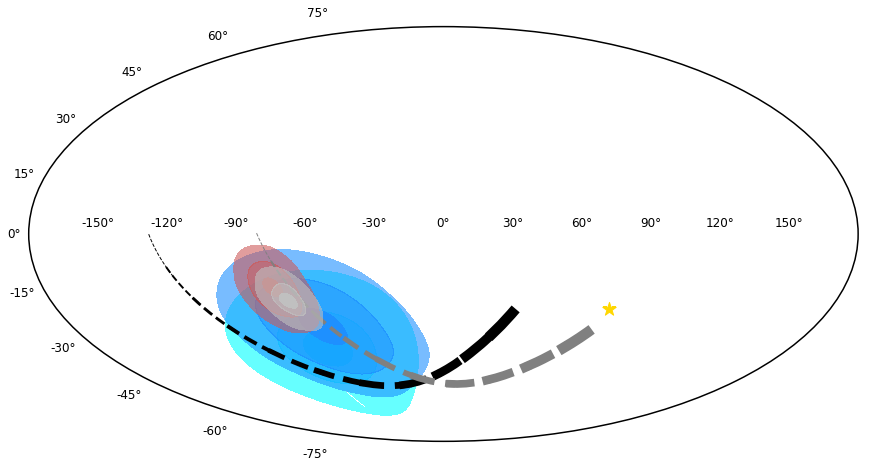

In [52]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0.0,0.02,1.,.96], projection="aitoff")


from reflexmotion import modelsats as ms
PHIP           = 178.45* np.pi/180.0;
THETA          = 114.89* np.pi/180.0;
PSI            = 54.05* np.pi/180.0;

PSI            = 9.05* np.pi/180.0;


Trans = ms.return_euler_slater(PHIP, THETA, PSI, 0)

phitest = np.linspace(1.42*np.pi,2.3*np.pi,50)
In0 = np.cos(phitest);
In1 = np.sin(phitest);
In2 = 0.0;
twisted  = np.dot(Trans,np.array([In0,In1,In2]))

#plt.plot(In0,In1)
#plt.plot(twisted[0],twisted[1])

lvals = -np.arctan2(twisted[1],twisted[0]) - 47.*np.pi/180.
bvals = -np.arcsin(twisted[2])


for indx in range(0,lvals.size-4,4):
    ax.plot(lvals[indx:indx+6],bvals[indx:indx+6],color='black',linestyle='dashed',lw=indx*0.24,zorder=92)


phitest = np.linspace(1.42*np.pi,2.27*np.pi,50)
In0 = np.cos(phitest);
In1 = np.sin(phitest);
In2 = 0.0;
twisted  = np.dot(Trans,np.array([In0,In1,In2]))

#plt.plot(In0,In1)
#plt.plot(twisted[0],twisted[1])

lvals = -np.arctan2(twisted[1],twisted[0])# - 47.*np.pi/180.
bvals = -np.arcsin(twisted[2])


for indx in range(0,lvals.size-4,4):
    ax.plot(lvals[indx:indx+6],bvals[indx:indx+6],color='gray',linestyle='dashed',lw=indx*0.24,zorder=92)




ax.scatter(80.*np.pi/180.,-30.*np.pi/180.,color='gold',marker='*',s=200)
#ax.scatter(lvals,bvals,color='black')#,linestyle='dashed',lw=1.5,zorder=92)



plot_aitoff_banana(ax,-(np.pi/180.)*(KGiants['phi']),(np.pi/180.)*KGiants['theta'],kcolor,border=False,bounds=[-1,-1,-1,-1],gridsize=120,binset=[90.,96.,99.5],zorder=90)

plot_aitoff_banana(ax,-(np.pi/180.)*(SAT['phi']),(np.pi/180.)*SAT['theta'],satcolor,border=False,bounds=[-1,-1,-1,-1],gridsize=100,binset=[92.,98.,99.5],zorder=88)

plot_aitoff_banana(ax,-(np.pi/180.)*(BHB['phi']),(np.pi/180.)*BHB['theta'],bhbcolor,border=False,bounds=[-1,-1,-1,-1],gridsize=120,binset=[90.,96.,99.5],zorder=89)

allcolor='silver'
plot_aitoff_banana(ax,-(np.pi/180.)*ALL['phi'],(np.pi/180.)*ALL['theta'],allcolor,border=True,bounds=[-1,-1,-1,-1],gridsize=120,binset=[92.,98.,99.5],zorder=100)








In [34]:
imgf = np.log10(img.T.reshape(-1,))

crange = np.linspace(np.nanpercentile(imgf,89.3),np.nanpercentile(imgf,96.8),48)


print(crange)

#manually adjust downward...
crange = np.linspace(0.,0.2,48)



dc = crange[1]-crange[0]



[0.         0.01015152 0.02030303 0.03045455 0.04060606 0.05075758
 0.0609091  0.07106061 0.08121213 0.09136364 0.10151516 0.11166668
 0.12181819 0.13196971 0.14212122 0.15227274 0.16242426 0.17257577
 0.18272729 0.19287881 0.20303032 0.21318184 0.22333335 0.23348487
 0.24363639 0.2537879  0.26393942 0.27409093 0.28424245 0.29439397
 0.30454548 0.314697   0.32484851 0.33500003 0.34515155 0.35530306
 0.36545458 0.37560609 0.38575761 0.39590913 0.40606064 0.41621216
 0.42636367 0.43651519 0.44666671 0.45681822 0.46696974 0.47712125]


In [35]:
def read_posterior(pfile):
    
    A = np.genfromtxt(pfile)
    
    dname = {}
    dname['vtravel'] = A[:,0]
    dname['phi'] = (180./np.pi)*A[:,1]
    dname['phi'][dname['phi']<0] += 360.
    dname['theta'] = 90.-(180./np.pi)*np.arccos(A[:,2])
    dname['sigmar'] = 1./np.sqrt(A[:,3])
    dname['sigmap'] = 1./np.sqrt(A[:,4])
    dname['sigmat'] = 1./np.sqrt(A[:,5])
    dname['vra'] = A[:,6]
    dname['vth'] = A[:,7]
    dname['vphi'] = A[:,8]
    
    return dname


SAT = read_posterior('/Users/mpetersen/Dropbox/mike/data/satellites_mcconnachie_minimum.posteriors')
KGiants = read_posterior('/Users/mpetersen/Dropbox/mike/data/KGiants_d040150_sgr20_L3000_corr.posteriors')
#SAT = read_posterior('/Users/mpetersen/Dropbox/mike/data/satellites_original_minimum.posteriors')
BHB = read_posterior(      '/Users/mpetersen/Dropbox/mike/data/BHBs_d040150_sgr20_L3000_lanc_corr.posteriors')
ALL = read_posterior('/Users/mpetersen/Dropbox/mike/data/all_d040150_sgr20_L3000_cov.posteriors')




cats = ['vtravel','phi','theta','sigmar','sigmap','sigmat','vra','vth','vphi']
dictnames = [ALL,BHB,KGiants,SAT]

def total_bounds(dictnames,cats):
    
    bounddict = {}
    
    for cat in cats:
        bounddict[cat] = [np.percentile(np.array(np.concatenate([dictname[cat] for dictname in dictnames])),0.2),\
                          np.percentile(np.array(np.concatenate([dictname[cat] for dictname in dictnames])),99.8)]

    return bounddict

bounddict = total_bounds(dictnames,cats)

    #

def make_banana(array1,array2,bounds=[-1,-1,-1,-1],gridsize=128):
    
    a,A = np.nanmin(array1),np.nanmax(array1)
    b,B = np.nanmin(array2),np.nanmax(array2)
    da,db = (A-a)/128.,(B-b)/128.
    
    if bounds[0]==bounds[1]:
        bounds = [a,A,b,B]
    
    
    xx,yy,dens = kde_3d.total_kde_two(array1,array2,\
                                       gridsize=gridsize,\
                                       extents=bounds,\
                                       ktype='gaussian',npower=8.)


    #print(da,db)
    return xx,yy,np.flipud(dens),da*db



def plot_aitoff_banana(ax,catx,caty,color,border=False,bounds=[-1,-1,-1,-1],gridsize=100,binset=[92.,98.,99.5],alphaspace=0.2,zorder=0):


    xx,yy,dens,dadb = make_banana(catx,caty,bounds=bounds,gridsize=gridsize)
    densflat = dens.reshape(-1,)
    bins = np.percentile(densflat,binset)
    for ib,b in enumerate(bins):
        lobin = bins[ib]
        if ib==(len(bins)-1):
            hibin = np.inf
        else:
            hibin = bins[ib+1]
        if border:
            #print(1+ib)
            ax.contourf(xx,yy,dens,[lobin,hibin],colors=color,alpha=alphaspace*(1+ib)+0.4,zorder=zorder)
        else:
            ax.contourf(xx,yy,dens,[lobin,hibin],colors=color,alpha=alphaspace*(1+ib)+0.4,zorder=zorder)
            

dictnames = [BHB,KGiants,SAT,ALL]
colorlist = ['blue','red','cyan','black']









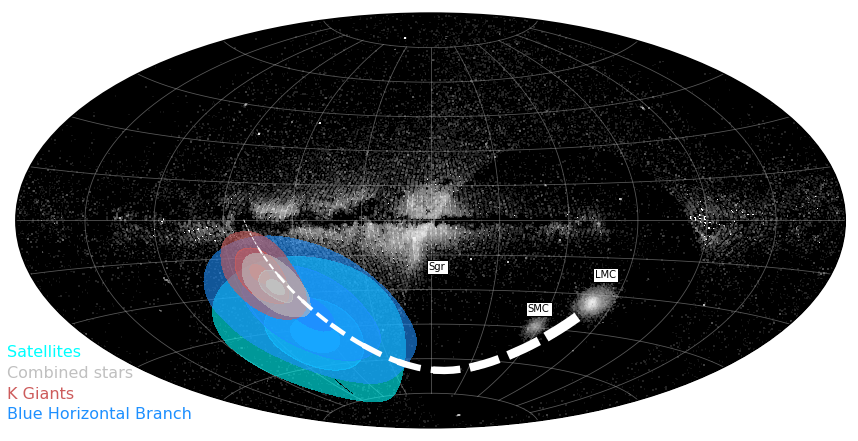

In [57]:

fig = plt.figure(figsize=(12,6))
#ax = plt.subplot(111, projection="aitoff")
ax = fig.add_axes([0.0,0.02,1.,.96], projection="aitoff")


crange = np.linspace(np.nanpercentile(imgf,91.),np.nanpercentile(imgf,100.),72)
#crange = np.linspace(np.nanpercentile(imgf,91.),np.nanpercentile(imgf,95.),48)



LL,BB = np.meshgrid(lbins,bbins)

imgf = np.log10(img.T.reshape(-1,))

# first layer: background black points
cvals = (imgf/np.nanmax(crange))[~np.isfinite(imgf)]

LLf = LL.reshape(-1,)[~np.isfinite(imgf)]
BBf = BB.reshape(-1,)[~np.isfinite(imgf)]

ax.scatter(-LLf*np.pi/180.,
           BBf*np.pi/180.,
           color='black',s=1.,marker='s')

# define the transition between second and fourth layers
colorcut = 2.0

# second layer: dark points
incbrightness = 0.15


cvals = (imgf/np.nanmax(crange))[np.isfinite(imgf)]

LLf = LL.reshape(-1,)[np.isfinite(imgf)][cvals<=colorcut]
BBf = BB.reshape(-1,)[np.isfinite(imgf)][cvals<=colorcut]
smlrg = np.argsort(cvals[cvals<=colorcut])

ax.scatter(-LLf[smlrg]*np.pi/180.,
           BBf[smlrg]*np.pi/180.,
           color=cm.Greys_r(cvals[cvals<=colorcut][smlrg],1.),s=0.13,marker='s')






# third layer: trajectory and posteriors
for indx in range(0,lvals.size-4,4):
    ax.plot(lvals[indx:indx+6],bvals[indx:indx+6],color='white',linestyle='dashed',lw=indx*0.23,zorder=92)



dictnames = [BHB,KGiants,SAT,ALL]
colorlist = ['blue','red','cyan','black']
colorlist = ['salmon','orange','salmon','cyan']


allcolor = 'silver'#'lightgray'#'blueviolet'#'red'#'pink'
kcolor = 'indianred'#'crimson'#'pink'#'red'
bhbcolor = 'dodgerblue'
satcolor = 'cyan'

plot_aitoff_banana(ax,-(np.pi/180.)*(KGiants['phi']),(np.pi/180.)*KGiants['theta'],kcolor,border=False,bounds=[-1,-1,-1,-1],gridsize=120,binset=[90.,96.,99.5],zorder=90)

plot_aitoff_banana(ax,-(np.pi/180.)*(SAT['phi']),(np.pi/180.)*SAT['theta'],satcolor,border=False,bounds=[-1,-1,-1,-1],gridsize=100,binset=[92.,98.,99.5],zorder=88)

plot_aitoff_banana(ax,-(np.pi/180.)*(BHB['phi']),(np.pi/180.)*BHB['theta'],bhbcolor,border=False,bounds=[-1,-1,-1,-1],gridsize=120,binset=[90.,96.,99.5],zorder=89)

allcolor='silver'
plot_aitoff_banana(ax,-(np.pi/180.)*ALL['phi'],(np.pi/180.)*ALL['theta'],allcolor,border=True,bounds=[-1,-1,-1,-1],gridsize=120,binset=[92.,98.,99.5],zorder=91)



# fourth layer: bright stellar points


cvals = (imgf/np.nanmax(crange))[np.isfinite(imgf)]

LLf = LL.reshape(-1,)[np.isfinite(imgf)][cvals>colorcut]
BBf = BB.reshape(-1,)[np.isfinite(imgf)][cvals>colorcut]
smlrg = np.argsort(cvals[cvals>colorcut])

ax.scatter(-LLf[smlrg]*np.pi/180.,
           BBf[smlrg]*np.pi/180.,
           color=cm.Greys_r(cvals[cvals>colorcut][smlrg]+incbrightness,1.),s=0.13,marker='s',zorder=100)



ax.grid(True,alpha=0.5)
ax.set_xticklabels(())
ax.set_yticklabels(())

ax.text(0.01, 0.098+0.048+0.048, 'Satellites', color=satcolor, transform=fig.transFigure,fontsize=16,va='center',ha='left')
ax.text(0.01,0.098+0.048, 'Combined stars', color=allcolor, transform=fig.transFigure,fontsize=16,va='center',ha='left')
ax.text(0.01, 0.098, 'K Giants', color=kcolor, transform=fig.transFigure,fontsize=16,va='center',ha='left')
ax.text(0.01, 0.05, 'Blue Horizontal Branch', color=bhbcolor, transform=fig.transFigure,fontsize=16,va='center',ha='left')





ax.text((np.pi/180.)*80.,(np.pi/180.)*-22.,'LMC',\
        color='black',size=10,ha='center',va='center',bbox=dict(facecolor='white', edgecolor='black',pad=2))
ax.text((np.pi/180.)*55.,(np.pi/180.)*-37.,'SMC',\
        color='black',size=10,ha='center',va='center',bbox=dict(facecolor='white', edgecolor='black',pad=2))
ax.text((np.pi/180.)*3.,(np.pi/180.)*-20.,'Sgr',\
        color='black',size=10,ha='center',va='center',bbox=dict(facecolor='white', edgecolor='black',pad=2))






ax.grid(True,alpha=0.5,zorder=10)
ax.set_xticklabels(())
ax.set_yticklabels(())


plt.savefig('figures/draftfigure1.png',dpi=400)







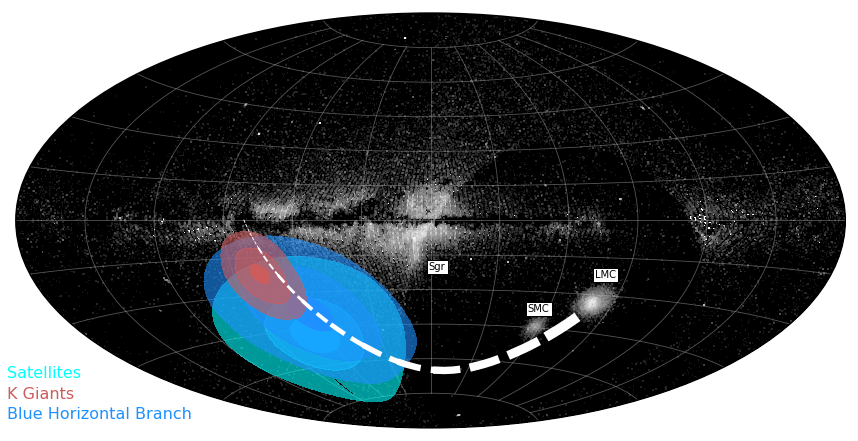

In [58]:

fig = plt.figure(figsize=(12,6))
#ax = plt.subplot(111, projection="aitoff")
ax = fig.add_axes([0.0,0.02,1.,.96], projection="aitoff")


crange = np.linspace(np.nanpercentile(imgf,91.),np.nanpercentile(imgf,100.),72)
#crange = np.linspace(np.nanpercentile(imgf,91.),np.nanpercentile(imgf,95.),48)



LL,BB = np.meshgrid(lbins,bbins)

imgf = np.log10(img.T.reshape(-1,))

# first layer: background black points
cvals = (imgf/np.nanmax(crange))[~np.isfinite(imgf)]

LLf = LL.reshape(-1,)[~np.isfinite(imgf)]
BBf = BB.reshape(-1,)[~np.isfinite(imgf)]

ax.scatter(-LLf*np.pi/180.,
           BBf*np.pi/180.,
           color='black',s=1.,marker='s')

# define the transition between second and fourth layers
colorcut = 2.0

# second layer: dark points
incbrightness = 0.15


cvals = (imgf/np.nanmax(crange))[np.isfinite(imgf)]

LLf = LL.reshape(-1,)[np.isfinite(imgf)][cvals<=colorcut]
BBf = BB.reshape(-1,)[np.isfinite(imgf)][cvals<=colorcut]
smlrg = np.argsort(cvals[cvals<=colorcut])

ax.scatter(-LLf[smlrg]*np.pi/180.,
           BBf[smlrg]*np.pi/180.,
           color=cm.Greys_r(cvals[cvals<=colorcut][smlrg],1.),s=0.13,marker='s')






# third layer: trajectory and posteriors
for indx in range(0,lvals.size-4,4):
    ax.plot(lvals[indx:indx+6],bvals[indx:indx+6],color='white',linestyle='dashed',lw=indx*0.23,zorder=92)



dictnames = [BHB,KGiants,SAT,ALL]
colorlist = ['blue','red','cyan','black']
colorlist = ['salmon','orange','salmon','cyan']


allcolor = 'silver'#'lightgray'#'blueviolet'#'red'#'pink'
kcolor = 'indianred'#'crimson'#'pink'#'red'
bhbcolor = 'dodgerblue'
satcolor = 'cyan'

plot_aitoff_banana(ax,-(np.pi/180.)*(KGiants['phi']),(np.pi/180.)*KGiants['theta'],kcolor,border=False,bounds=[-1,-1,-1,-1],gridsize=120,binset=[90.,96.,99.5],zorder=90)

plot_aitoff_banana(ax,-(np.pi/180.)*(SAT['phi']),(np.pi/180.)*SAT['theta'],satcolor,border=False,bounds=[-1,-1,-1,-1],gridsize=100,binset=[92.,98.,99.5],zorder=88)

plot_aitoff_banana(ax,-(np.pi/180.)*(BHB['phi']),(np.pi/180.)*BHB['theta'],bhbcolor,border=False,bounds=[-1,-1,-1,-1],gridsize=120,binset=[90.,96.,99.5],zorder=89)

#allcolor='silver'
#plot_aitoff_banana(ax,-(np.pi/180.)*ALL['phi'],(np.pi/180.)*ALL['theta'],allcolor,border=True,bounds=[-1,-1,-1,-1],gridsize=120,binset=[92.,98.,99.5],zorder=91)



# fourth layer: bright stellar points


cvals = (imgf/np.nanmax(crange))[np.isfinite(imgf)]

LLf = LL.reshape(-1,)[np.isfinite(imgf)][cvals>colorcut]
BBf = BB.reshape(-1,)[np.isfinite(imgf)][cvals>colorcut]
smlrg = np.argsort(cvals[cvals>colorcut])

ax.scatter(-LLf[smlrg]*np.pi/180.,
           BBf[smlrg]*np.pi/180.,
           color=cm.Greys_r(cvals[cvals>colorcut][smlrg]+incbrightness,1.),s=0.13,marker='s',zorder=100)



ax.grid(True,alpha=0.5)
ax.set_xticklabels(())
ax.set_yticklabels(())

ax.text(0.01, 0.098+0.048, 'Satellites', color=satcolor, transform=fig.transFigure,fontsize=16,va='center',ha='left')
#ax.text(0.01,0.098+0.048, 'Combined stars', color=allcolor, transform=fig.transFigure,fontsize=16,va='center',ha='left')
ax.text(0.01, 0.098, 'K Giants', color=kcolor, transform=fig.transFigure,fontsize=16,va='center',ha='left')
ax.text(0.01, 0.05, 'Blue Horizontal Branch', color=bhbcolor, transform=fig.transFigure,fontsize=16,va='center',ha='left')





ax.text((np.pi/180.)*80.,(np.pi/180.)*-22.,'LMC',\
        color='black',size=10,ha='center',va='center',bbox=dict(facecolor='white', edgecolor='black',pad=2))
ax.text((np.pi/180.)*55.,(np.pi/180.)*-37.,'SMC',\
        color='black',size=10,ha='center',va='center',bbox=dict(facecolor='white', edgecolor='black',pad=2))
ax.text((np.pi/180.)*3.,(np.pi/180.)*-20.,'Sgr',\
        color='black',size=10,ha='center',va='center',bbox=dict(facecolor='white', edgecolor='black',pad=2))






ax.grid(True,alpha=0.5,zorder=10)
ax.set_xticklabels(())
ax.set_yticklabels(())


plt.savefig('figures/draftfigure1_noall.png',dpi=400)








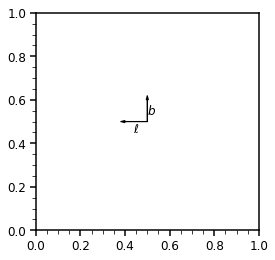

In [54]:
plt.figure(figsize=(4,4))

plt.arrow(0.5,0.5,-0.1,0.0,head_width=0.01, head_length=0.02)
plt.arrow(0.5,0.5,0.0,0.1,head_width=0.01, head_length=0.02)
plt.text(0.45,0.465,'$\ell$',size=12,ha='center',va='center')
plt.text(0.52,0.55,'$b$',size=12,ha='center',va='center')


plt.savefig('figures/arrow.png',dpi=400)